In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = "C:/Users/Maryl/breast_cancer_classifier/data/interim/dataset_numerical_target.csv"
data = pd.read_csv(dataset_path)


In [24]:
mean_cols = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']



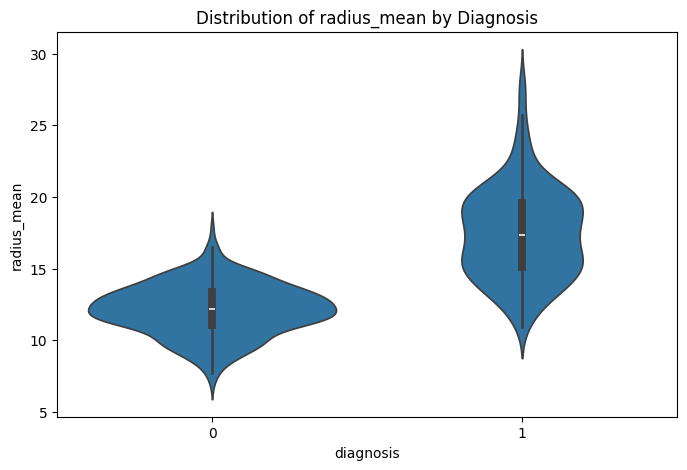

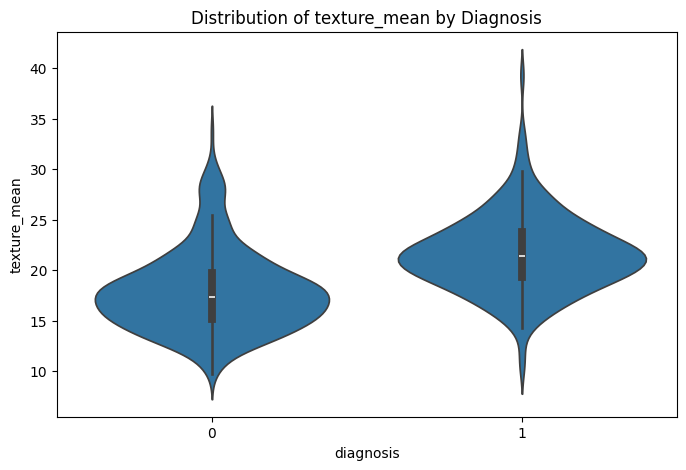

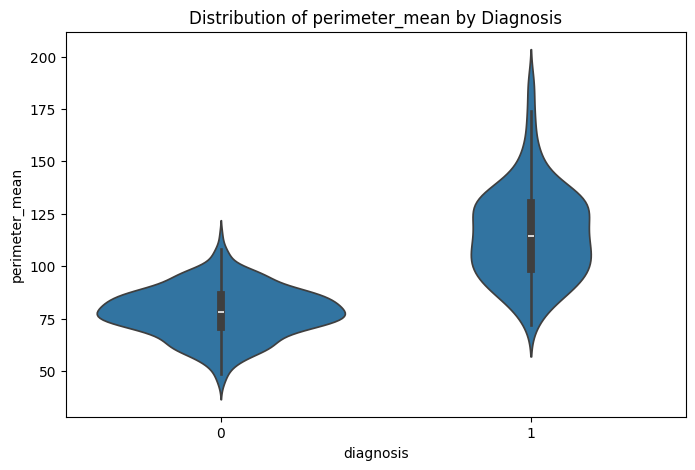

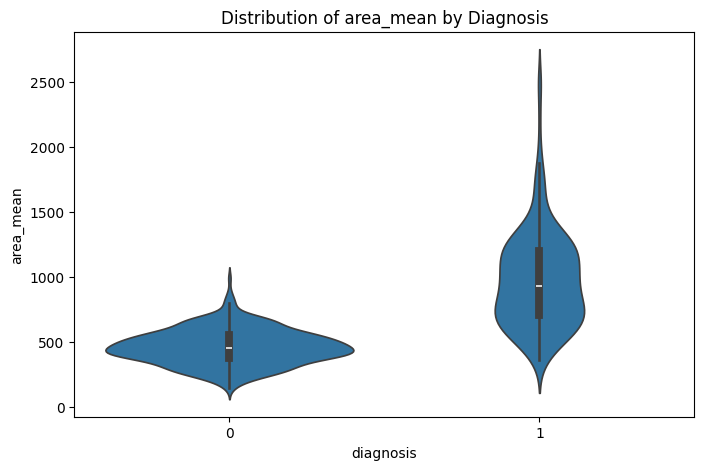

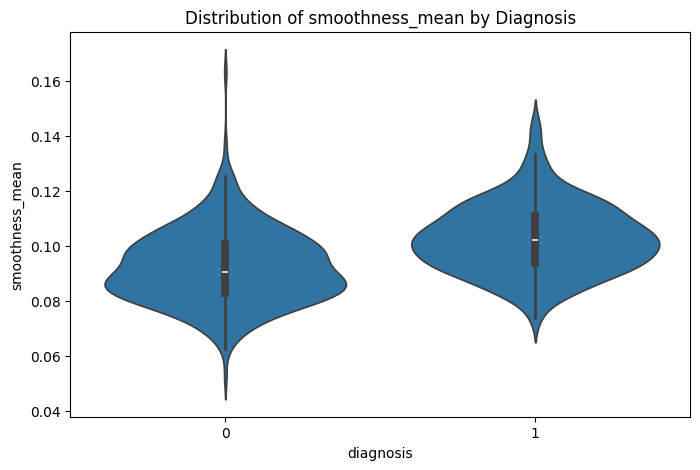

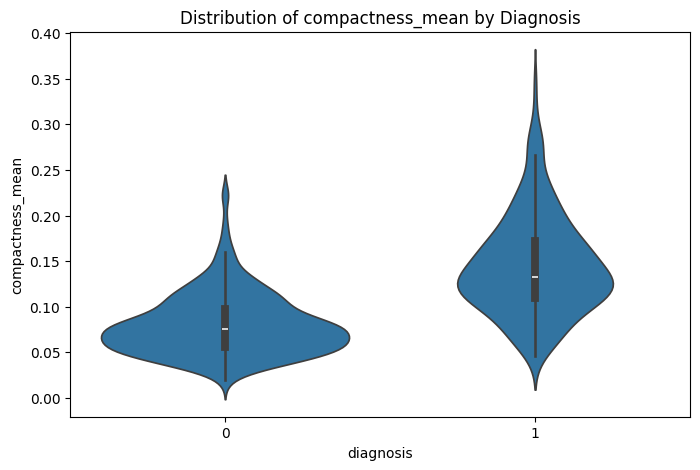

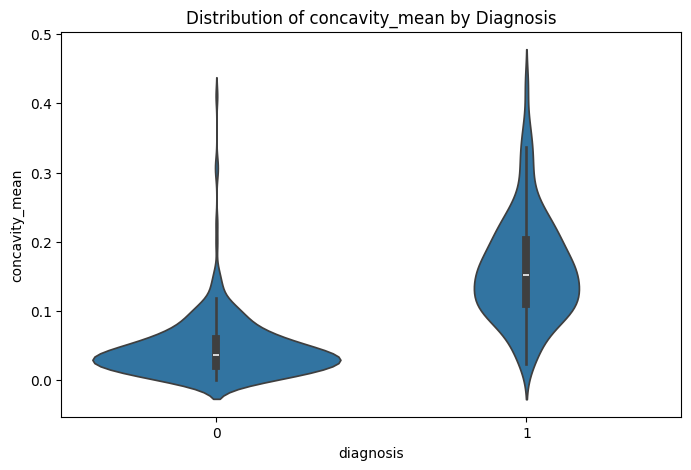

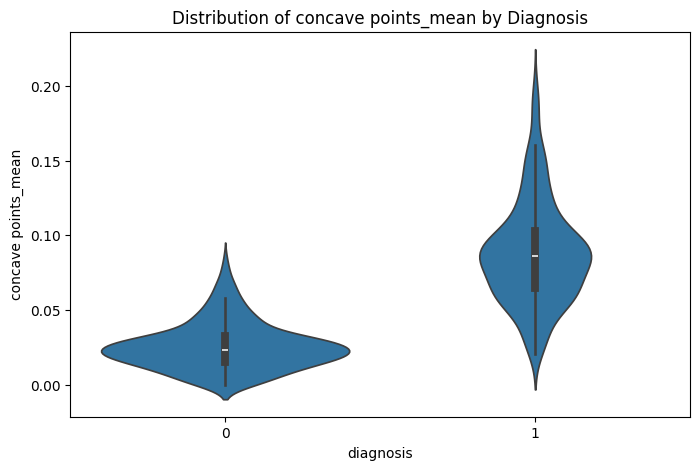

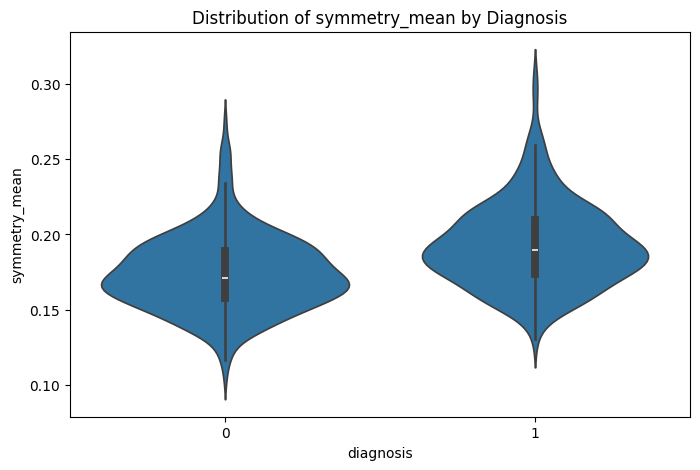

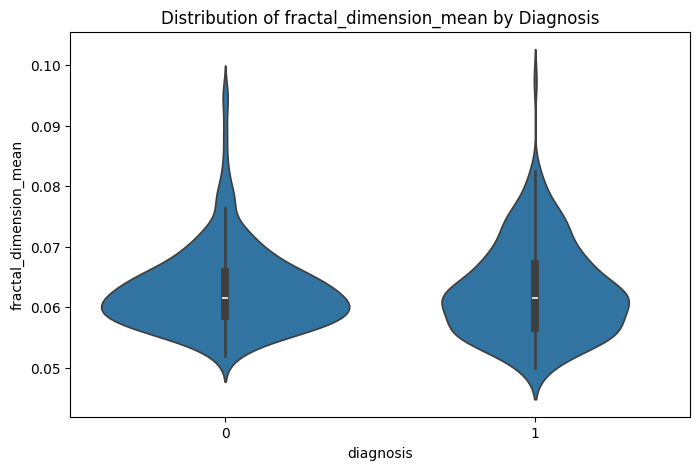

In [25]:
for feature in mean_cols[1:]:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='diagnosis', y=feature, data=data)
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.show()

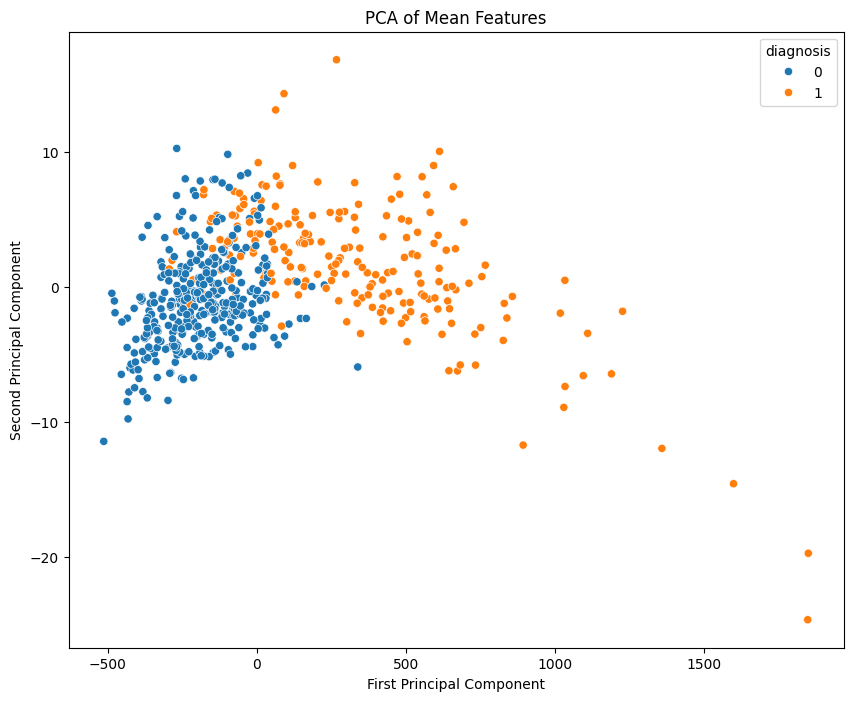

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_means = pca.fit_transform(data[mean_cols[1:]])
pca_means_cols = ["PC1_means", "PC2_means"]
data_pca = data.copy()
data_pca[pca_means_cols] = X_pca_means

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_means[:, 0], y=X_pca_means[:, 1], hue=data['diagnosis'])
plt.title('PCA of Mean Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [27]:
worse_cols = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

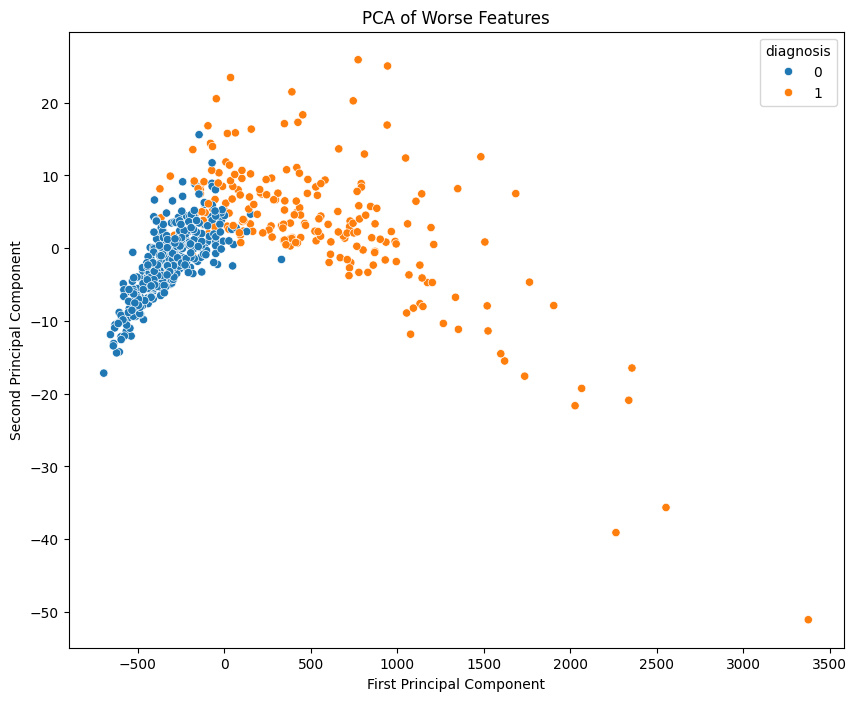

In [28]:

pca = PCA(n_components=2)
X_pca_worse = pca.fit_transform(data[worse_cols[1:]])
pca_worse_cols = ["PC1_worse", "PC2_worse"]
data_pca[pca_worse_cols] = X_pca_worse

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_worse[:, 0], y=X_pca_worse[:, 1], hue=data['diagnosis'])
plt.title('PCA of Worse Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [29]:
se_cols = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

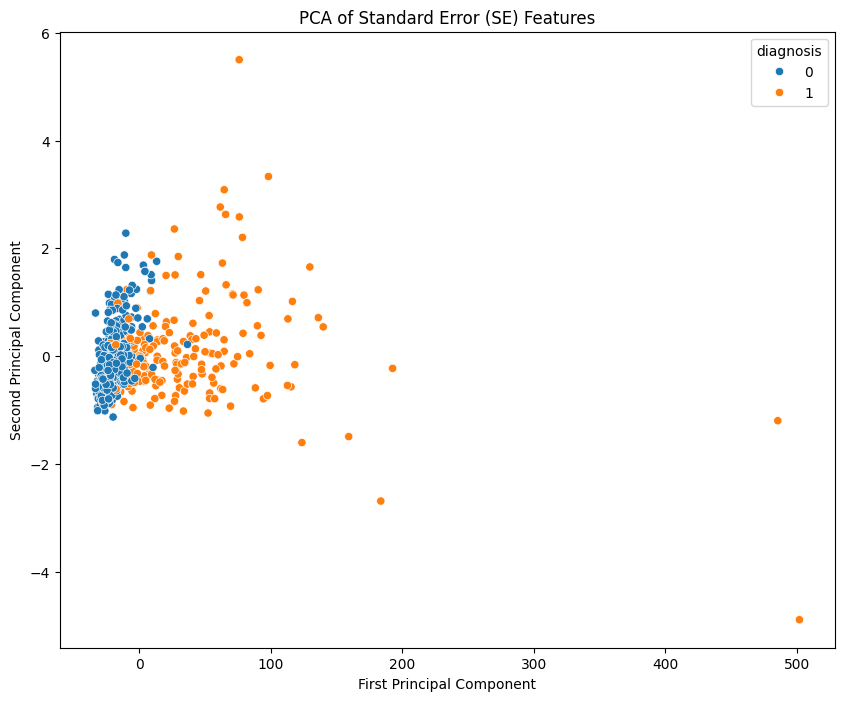

In [30]:
pca = PCA(n_components=2)
X_pca_se = pca.fit_transform(data[se_cols[1:]])
pca_se_cols = ["PC1_se", "PC2_se"]
data_pca[pca_se_cols] = X_pca_se

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_se[:, 0], y=X_pca_se [:, 1], hue=data['diagnosis'])
plt.title('PCA of Standard Error (SE) Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [31]:
# #Data Normalization
#note: do not standardize before splitting the data
# scaler = StandardScaler()
# scaler.fit(data)
# standardized_data = scaler.transform(data)
# standardized_data

In [32]:
data_pca.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'PC1_means', 'PC2_means',
       'PC1_worse', 'PC2_worse', 'PC1_se', 'PC2_se'],
      dtype='object')

In [33]:
data_pca.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,PC1_means,PC2_means,PC1_worse,PC2_worse,PC1_se,PC2_se
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.7119,0.2654,0.4601,0.11890,347.389726,-3.450288,1140.978986,7.468413,113.204746,0.690344
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.2416,0.1860,0.2750,0.08902,672.360671,-6.224454,1076.619259,-11.828989,33.735343,-1.019933
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4504,0.2430,0.3613,0.08758,549.459902,0.291601,829.672981,-3.324064,53.718366,-0.684875
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.6869,0.2575,0.6638,0.17300,-269.152753,4.105000,-312.841940,9.902188,-13.070909,0.994878
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.4000,0.1625,0.2364,0.07678,643.562714,-6.209533,695.842154,1.377358,54.163589,0.055323
